In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Comparing proportions
Comparing proportions of categorical variable on two populations can be done for statistical analysis of the population. For example, in a survey of smokers and non-smokers, we can compare proportions of answers given by either group to find out if there is any significant difference in the answers provided by each group. 

Let's consider another example:

According to www.statista.com/, the proportion of branded to unbranded generic medications is 5:1. An NGO is exploring incentive to increase use of unbranded generics as to control healthcare spending. So as a trial, the NGO tested the incentives program in a certain geographical area for one year. Then according to a survey of the medication sold conducted in that area, 3,766 out of 4,434 drugs were generics. 

Is the result different from the national proportion of branded to unbranded generic medications?
Note that we are merely asking whether the results are different, not whether the program worked?

### Testing Proportion

According to www.statista.com/, a ratio of 5:1 or 5/6 or ~ **83%** of the drugs are generic.
Our survey showed 3,766 out of 4,434 or 3,766/4,434 or **84.9%** of the drugs sold were generic.

We want to consider: Can this result be due to sampling alone or is the strategy causing the result to be different ?
We are interested in the distance between the national ratio (83%) and the survey results. If the distance between national ratio and the survey results is big, we get to know that the incentive method used by NGO is causing some difference in the drugs consumption.
  



### Deciding on the Test Statistic

To conduct our testing, we need some test metric. We can use the absolute distance between the national proportion and that obtained from the survey as our test metrics.

```
∣ % of generic drugs obtained from sample  − 83 ∣
```

Now, we can state our Null and Alternative Hypothesis as follows. 

**Null Hypothesis:** There is no difference between sample % of generic drugs sold and national proportion (83%) i.e. the observed difference is merely due to sampling variance.


**Alternative Hypothesis:** The difference is unlikely to have arisen due to chance alone.

### Simulating Data to Sampling Distribution of the Test Statistic

Let's look back at our test statistics, what are the plausible values of the test statistic under the null hypothesis?

The sampled proportion can be greater or less or equal to national proportion, our test statistics will return the absolute value of the difference between the sampled and national proportion. If we were to sample data from outside of the testing area, a difference of the sampled and national proportion will look like following.


<img src="http://128.171.10.138:4000/assets/ipynb/week_6/images/method_ratio.png" alt="drawing" style="width:400px;"/>

### Question 

What does the resulting Distribution look like?

<img src="http://128.171.10.138:4000/assets/ipynb/week_6/images/answers_a_b.png" alt="drawing" style="width:800px;"/>

### Answer
Note that we are taking the absolute value of the difference, so the resulting distribution looks like figure **B**. However if we had just considered the difference of the sampled mean and national mean as our test statistic, the resulting distribution would have looked like figure **A**. 

Let's verify our answer by plotting the graph.

1. So first we'll generate our values for the differences using normal distribution with $mean(\mu) = 0$ and $standard\ deviation(\sigma) = 2$
2. Then we'll plot the differences and absolute value of the difference using histogram plot


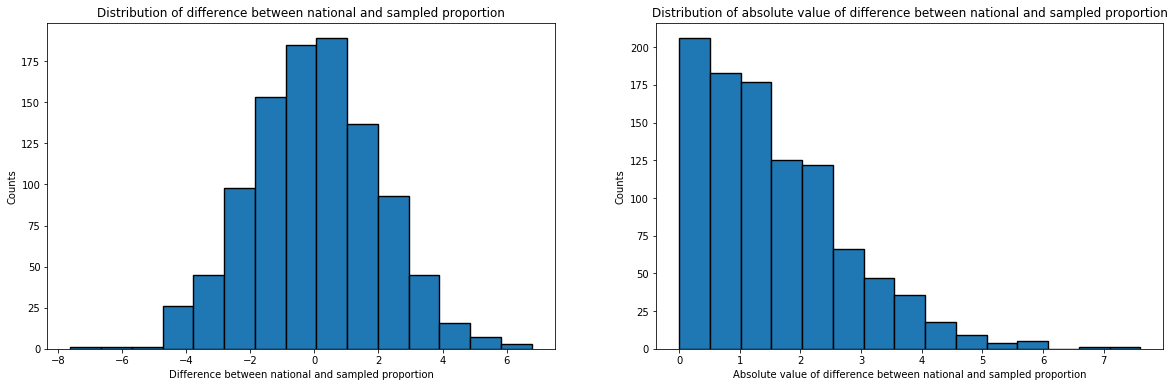

In [2]:
data = np.random.normal(0,2, 1000)

plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
plt.ylabel("Counts")
plt.xlabel("Difference between national and sampled proportion")
plt.title("Distribution of difference between national and sampled proportion")

difference_plot = plt.hist(data, bins=15, edgecolor='k', linewidth=1.4)

plt.subplot(1, 2, 2)
plt.ylabel("Counts")
plt.xlabel("Absolute value of difference between national and sampled proportion")
plt.title("Distribution of absolute value of difference between national and sampled proportion")

abs_difference_plot = plt.hist(np.abs(data), bins=15, edgecolor='k', linewidth=1.4)


### Question

Physical sampling of another dataset from the surveyed area might cost more resources for the researchers, so to avoid that cost of actual sampling we might want to generate random samples that looks like those produced under the null hypothesis. So what other strategies can we use to explore the range of difference between 83% and samples that come from the same distribution ?

To generate the random dataset with that agrees with our null hypothesis, we can use `np.random.choice` method and pass the probabilites of the choices (in our case probability of branded drugs=0.83 and probability of generic drug = 0.13)

In [3]:
# First example
model_proportions = [0.17, 0.83]

data = np.random.choice(["B","G"], p=model_proportions, size=4434)
data



array(['B', 'G', 'G', ..., 'G', 'G', 'G'], dtype='<U1')

Now we have our random dataset similar to ones we had collected from the survey. Let's verify the proportion of the Generic drugs in our newly generated data (it should be ~ 83%)

In [4]:
sum(data == "G") / 4434 * 100

83.96481732070366

We can also use the binomial distribution(`np.random.binomial(n, p)` to generate the count of certain event from `n` trials with `p` probability of success. For our case `n = 4434` and `p = 0.83` and our event is the Generic drug.

In [5]:
# Or using the binomial distribution
np.random.binomial(4434, 0.83) / 4434 * 100

82.00270635994588

Now we have a method to simulate random sample from our population. Let's use the generated sampling data to generate the our test statistics (the difference between national proportion and sampled proportion) and plot the result in a histogram.

Text(0.5, 1.0, 'Distribution of absolute value of difference between national and sampled proportion')

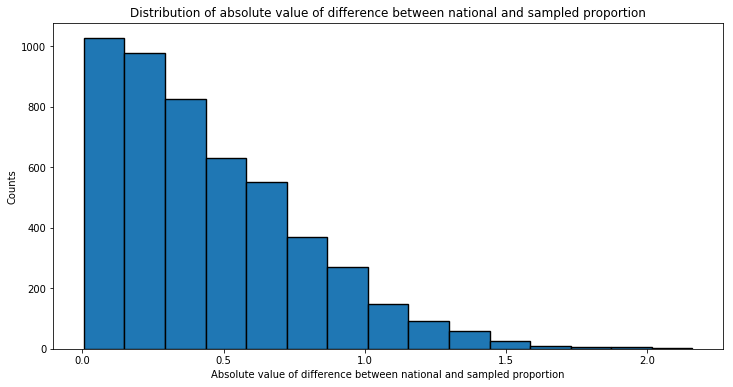

In [6]:
plt.figure(figsize=(12,6))

sample_diffs_null = []
for _ in range(5000):
    sample_proportion = sum(np.random.choice([0,1], p=model_proportions, size=4434)) / 4434 * 100
    sample_diff = np.abs(sample_proportion - 83)
    sample_diffs_null.append(sample_diff)
_ = plt.hist(sample_diffs_null, bins=15, edgecolor='k', linewidth=1.4)
plt.ylabel("Counts")
plt.xlabel("Absolute value of difference between national and sampled proportion")
plt.title("Distribution of absolute value of difference between national and sampled proportion")


We have a distribution of how our difference should look like. Let's move to our initial problem: 

According to www.statista.com/, a ratio of 5:1 or 5/6 or ~ 83% of the drugs are generic. Our survey showed 3,766 out of 4,434 or 3,766/4,434 or 84.9% of the drugs sold were generic. 

For our case the difference would be $abs(84.9 - 83) = 1.9$
Let's plot the difference to our histogram.

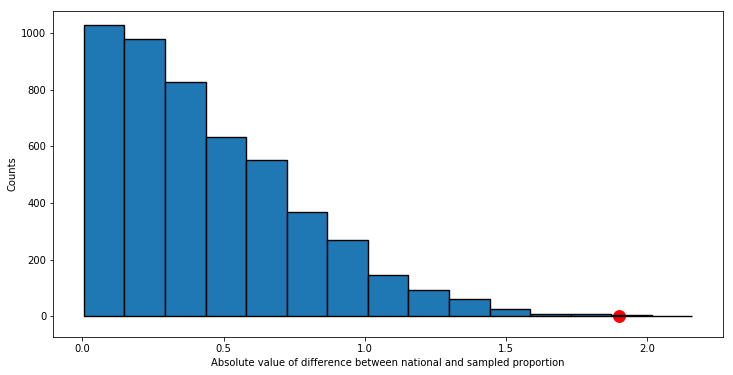

In [7]:
plt.figure(figsize=(12,6))
_ = plt.hist(sample_diffs_null, bins=15, edgecolor='k', linewidth=1.4)

_ = plt.scatter( 1.9 ,0, color='r', s=140)

_ = plt.ylabel("Counts")
_ = plt.xlabel("Absolute value of difference between national and sampled proportion")


From the graph above, our difference is on far corner of the graph. Let's compute our p-value for our experiment to see how likely our null hypothesis.

In [8]:
# computimg the p-value
p_value = sum(np.array(sample_diffs_null) > 1.9) / len(sample_diffs_null)
p_value

0.0012

Our p-value is low so we accept the null hypothesis that says `There is no difference between sample % of generic drugs sold and national proportion (83%) i.e. the observed difference is merely due to sampling variance.`

### Comparing Multiple Categories

In the above section, hypothesis testing was conducted in a single category namely `drugs_sold`. If we want to conduct simillar test for multiple categories, same method as we used earlier extends to models with multiple categories. The approach will be same as before only difference will be the new test statistic. 

Let's look at an example to make it clear.


### New Methods for Estimating Fish Diversity?

<img src="http://128.171.10.138:4000/assets/ipynb/week_6/images/eDNA_fish.png" alt="drawing" style="width:900px;"/>


The news article above mentions a new method named `eDNA` for estimate the diversity of fish in a given area. The new method use a faster, autonomous machine learning-based method to estimate the diversity of fish.


### New Methods for Estimating Fish Diversity - Cont'd

Researcher can use a manual method of getting diversity of fish in a given area by collecting the fish counts and report the ratios for a group of fish variety (say Tilapia, Blenny, Angelfish, Salmon and Other in a pisciculture pond). This method of data collection is tedious and requires lots of effort to collect. Presently researcher user the manual collection method to get the counts of the fish diversity.

As an alternative `eDNA` is new method that is available to researcher to get the estimate of ratios of fish diversity in a given area. The comparitive results between manual and `eDNA` method are shown in the graph below.


In [9]:
fish_proportions = pd.DataFrame({'kind': ['Tilapia', 'Blenny', 'Angelfish', 'Salmon', 'Other'], 'sampled': [0.20, 0.08, 0.12, 0.54, 0.06], 'eDNA': [0.26, 0.08, 0.08, 0.54, 0.04]})

fish_proportions

,kind,sampled,eDNA
0,Tilapia,0.20,0.26
1,Blenny,0.08,0.08
2,Angelfish,0.12,0.08
3,Salmon,0.54,0.54
4,Other,0.06,0.04


Let's look at the difference between the ratio of manually collected dataset and the ratio we got from `eDNA`.

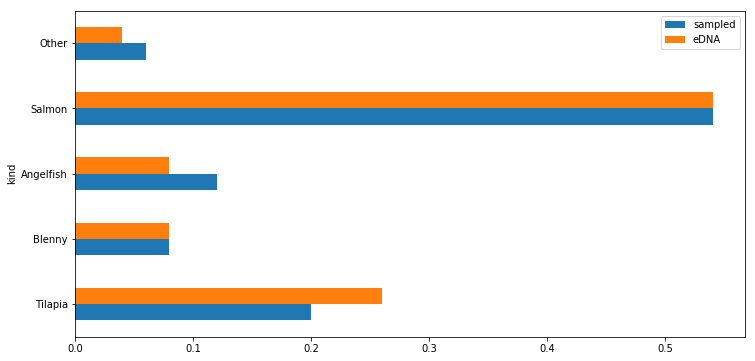

In [10]:
fish_proportions.plot.barh(x="kind", figsize=(12,6))

### Question

From the graph above we notice that the data distribution is slightly different and we want to find out is that difference significant. So we should formulate our hypotheses for our test. Specifically we want to find answer to following questions:
  1. What are the null and alternative hypotheses? 
  2. What is a useful test statistic for this problem?
  3. How can we generate data following the null hypothesis?

We did answer same question for our test for single category above. So, how does answer to these change when we move from a single category to multiple categories?



# Null and Alternative Hypotheses

## Null Hypothesis

The null hypothesis is that the observed difference between the results from the two methods is due to chance. This occurs when the difference is so small that the same distribution could have produced both outcomes. Since we want the results from the new method to be similar to the old one in order for it to be useful, meaning that they should come from the same distribution, this provides statistical evidence that supports our new method. If we sampled again using the old method, we could very well get a larger difference, since the sample could vary a bit.

## Alternative Hypothesis

The alternative hypothesis is that the observed difference between the results from the two methods cannot be due to chance. This occurs when the difference is so large that it is very unlikely that the same distribution could have produced both outcomes. In this case, we cannot say that the results from our new method are similar to the old method, so our new method is useless. If we were to sample again using the old method, it is likely that the difference would still be large, since it is unlikely for the sample to change too much.

We are not concerned about whether our old method is accurate or not. We simply want to know if the new method gives the same results as the old one.

# Test Statistic

For a good test statistic which lets us evaluate the difference between the two distributions, we use the **total variation distance (tvd)**: $$tvd = \frac{1}{2}\sum_{x \in \Omega}|P(x) - Q(x)|$$

We sum the absolute values of the differences of the individual categories and divide the sum by 1/2. We take the absolute value because we do not want the positive values to cancel out the negative values, leaving us with a tvd of 0 even though the distributions clearly differ.

The total variation distance is similar to the Euclidean distance between two points, which is given by $$\sqrt{\sum_{i=1}^{n}(u_i-v_i)^2}$$
where $$u=(u_1,u_2,...,u_n)$$ and $$v=(v_1,v_2,...,v_n)$$

Now calculating the difference in code is easy. Simply use sum and np.abs.

# Generating Data

We can generate data for the sampling distribution that we would see if the null hypothesis was true. If we only had two categories and we know the proportion of each category, we could use the binomial distribution and generate an array of instances of the two categories using np.random.choice, plugging in the choices, the probabilities of the choices, and how many instances we want to generate. Alternatively, we could use np.random.binomial, passing in the size and probability of success. Instead of getting the simulated population array, we would get the number of successes returned to us, which is equivalent.

But since we have multiple categories, we should use a multinomial distribution. A multinomial distribution is a generalization of the binomial distribution. In order to use the multinomial distribution, certain criteria have to be fulfilled. The trials must be independent and the probability of each outcome across trials must remain constant. Then, given n trials in an experiment, with each trial having a discrete number of possible outcomes known as categories, we can use the multinomial distribution. Similar to the binomial, we can either use np.random.choice or np.random.multinomial. Both takes in the probabilities of each category and the population size that we want to generate, but np.random.choice also takes in the names of the categories, so it is able to return the simulated population, whereas np.random.multinomial simply returns the number of instances in each category. Although the categories are unlabeled, we can infer what they are based on their positions.

# Simulating the Experiment

 In the simulation below we generate a random sample of 5000 test cases using the multinomial distributions and the observed proportions of the sampled data.

In [11]:
samples_tvd = []

for i in range(5000):
    sample_proportions = np.random.multinomial(500,  pvals=fish_proportions["sampled"]) / 500
    sample_tvd = 1/2 * sum(np.abs(fish_proportions['sampled'].tolist() - sample_proportions) )
    samples_tvd.append(sample_tvd)

In the histograms below, we observe the total variation distance (tvd) of the 5000 test cases. The observed tvd is denoted by the red dot.  

Text(0.5, 0, 'tvd distribution')

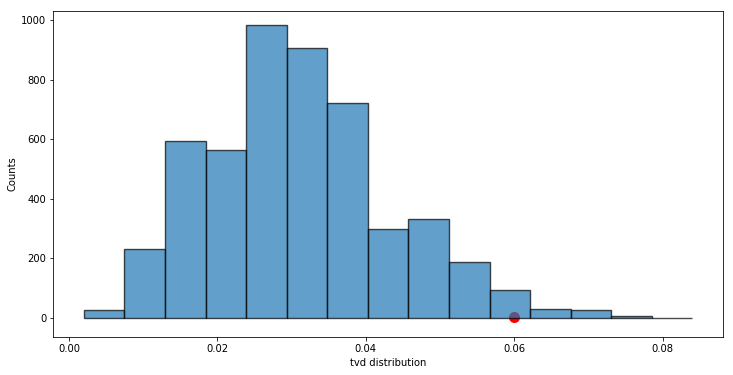

In [12]:
plt.figure(figsize=(12,6))
_ = plt.hist(samples_tvd, bins=15, edgecolor='k', linewidth=1.4, alpha=0.7)

observed_tvd = 1/2 * sum(np.abs(fish_proportions['sampled'] - fish_proportions['eDNA']) )

plt.scatter(observed_tvd, 2, color='r', s=100)
plt.ylabel("Counts")
plt.xlabel("tvd distribution")

In [13]:
p_value = np.sum([np.array(samples_tvd) > observed_tvd]) / len(samples_tvd)
p_value

0.0206

Using a p-value threshold of 0.05 the distribution of fish kind is different using both methods.

**TVD: 0.012** which is far out in the tail of the histogram above

The difference does not say why the distributions are different or what the difference might imply
